In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### Question 1:

In [2]:
preference_df = pd.read_csv('mugs-preference-parameters-full.csv')
c = 0.0139

In [3]:
Imp_Matrix = preference_df.iloc[:,-6:]
Feature_Matrix = preference_df.iloc[:,:-6]

In [4]:
multiplier = {" pPr30": " IPr"," pPr10": " IPr"," pPr05": " IPr",
              "pIn0.5": "Iin", "pIn1": "Iin", "pIn3": "Iin",
              " pCp12": " ICp", " pCp20": " ICp", " pCp32": " ICp", 
              " pClD": " ICl", " pClF": " ICl", " pClE": " ICl", 
              "pCnSl": "Icn","pCnSp": "Icn", "pCnLk": "Icn", 
              " pBrA": " IBr"," pBrB": " IBr", " pBrC": " IBr"}

In [5]:
Weighted_Feature = Feature_Matrix.copy()

In [6]:
for col1, col2 in multiplier.items():
    Weighted_Feature[col1] = Weighted_Feature[col1] * Imp_Matrix[col2]

In [7]:
Brands = pd.DataFrame([[" pPr30", "pIn3"," pCp20"," pClE", "pCnLk", " pBrA"],
          [" pPr10", "pIn1"," pCp20"," pClF", "pCnSp", " pBrB"],
          [" pPr30", "pIn1"," pCp20"," pClE", "pCnLk", " pBrC"]])

In [8]:
out_1 = [ ]
for index, rows in Weighted_Feature.iterrows():
    out = []
    for rows_1 in Brands.itertuples():
        cols = list(rows_1)
        cols.pop(0)
        U = rows.loc[cols].sum()
        out.append(U)
    out_1.append(out)
    
a = np.exp(np.multiply(c,out_1))
probs = pd.DataFrame(a)
probs['sum'] = probs.sum(axis=1)

In [9]:
probs.iloc[:, :3] = probs.iloc[:, :3].div(probs.iloc[:, -1], axis=0)

In [10]:
means = np.array([probs.iloc[:, i].mean() for i in range(3)]) #these are the shares

In [11]:
print('Share for P3:', means[2])

Share for P3: 0.19452610767391657


In [12]:
cost_p3 = 1.0 + 2.6 + 3.0 + 1.0 
margin_p3 = 30 - cost_p3
EPP_p3 = means[2] * margin_p3
print(cost_p3, margin_p3, EPP_p3)

7.6 22.4 4.357384811895731


***
### Question 2:

In [13]:
cost = {
    " pPr30":0, 
    " pPr10":0,
    " pPr05":0,
    "pIn0.5":0.5,
    "pIn1":1, 
    "pIn3":3,
    " pCp12":1.0,
    " pCp20":2.6, 
    " pCp32":2.8,
    " pClD":1.0, 
    " pClF":2.2,
    " pClE":3.0,
    "pCnSl":0.5, 
    "pCnSp":0.8, 
    "pCnLk":1.0,
    " pBrA":0,
    " pBrB":0, 
    " pBrC":0
}

cost_arr = pd.DataFrame([[" pPr30", " pPr10", " pPr05"],
                         ["pIn0.5", "pIn1", "pIn3"],
                         [" pCp12", " pCp20", " pCp32"],
                         [" pClD", " pClF", " pClE"], 
                         ["pCnSl", "pCnSp", "pCnLk"]])

In [14]:
#enumerating all possible candidate products
Pr = [' pPr30',' pPr10',' pPr05']
In = ['pIn0.5','pIn1','pIn3']
Cp = [' pCp12',' pCp20',' pCp32']
Cl = [' pClD',' pClF',' pClE']
Cn = ['pCnSl','pCnSp','pCnLk']
lists = [Pr, In, Cp, Cl, Cn]
all_prod = pd.DataFrame(list(itertools.product(*lists)), columns=['Pr', 'In', 'Cp', 'Cl', 'Cn'])
all_prod['Brand'] = ' pBrC'

In [15]:
#calculating utilities
out_2 = [ ]
for index, rows in Weighted_Feature.iterrows():
    out_3 = []
    for rows_1 in all_prod.itertuples():
        cols = list(rows_1)
        cols.pop(0)
        U1 = rows.loc[cols].sum()
        out_3.append(U1)
    out_2.append(out_3)

In [16]:
cost_func = [ ]
for index, row in all_prod.iterrows():
    cols = 0
    for col_name, value in row.items():
        cols = cols+cost.get(value)
    cost_func.append(cols)    
cost_function = pd.DataFrame(cost_func)

In [17]:
all_prod_final = all_prod.copy()
all_prod_final['cost'] = cost_function.iloc[:,:]

In [18]:
a1 = np.exp(np.multiply(c,out_2))
probs1 = pd.DataFrame(a1) 
probs1['sum'] = probs.sum(axis=1)

In [19]:
probs1.iloc[:, :243] = probs1.iloc[:, :243].div(probs1.iloc[:, -1], axis=0)

In [20]:
means1 = np.array([probs1.iloc[:, i].mean() for i in range(243)]) #shares for 243 products

In [21]:
means_1 = pd.DataFrame(means1)
all_prod_final['Share'] = means_1.iloc[:,:]

In [22]:
price = {" pPr30":30, 
    " pPr10":10,
    " pPr05":5,
}
ins = {"pIn0.5":0.5, 
    "pIn1":1,
    "pIn3":3,
}
cap = {" pCp12":12, 
    " pCp20":20,
    " pCp32":32,
}
cl = {" pClD":'Difficult', 
    " pClF":'Fair',
    " pClE":'Easy',
}
con = {"pCnSl":'Slosh', 
    "pCnSp":'Spill',
    "pCnLk":'Leak',
}
br = {" pBrC":'C'}


all_prod_final.iloc[:,0] = all_prod_final.iloc[:,0].replace(price)
all_prod_final.iloc[:,1] = all_prod_final.iloc[:,1].replace(ins)
all_prod_final.iloc[:,2] = all_prod_final.iloc[:,2].replace(cap)
all_prod_final.iloc[:,3] = all_prod_final.iloc[:,3].replace(cl)
all_prod_final.iloc[:,4] = all_prod_final.iloc[:,4].replace(con)
all_prod_final.iloc[:,5] = all_prod_final.iloc[:,5].replace(br)

all_prod_final['margin'] = all_prod_final['Pr'] - all_prod_final['cost']
all_prod_final['EPP'] = all_prod_final['Share'] * all_prod_final['margin']
all_prod_final

,Pr,In,Cp,Cl,Cn,Brand,cost,Share,margin,EPP
0,30,0.5,12,Difficult,Slosh,C,3.0,0.016842,27.0,0.454734
1,30,0.5,12,Difficult,Spill,C,3.3,0.027773,26.7,0.741533
2,30,0.5,12,Difficult,Leak,C,3.5,0.042391,26.5,1.123363
3,30,0.5,12,Fair,Slosh,C,4.2,0.031501,25.8,0.812736
4,30,0.5,12,Fair,Spill,C,4.5,0.050542,25.5,1.288813
...,...,...,...,...,...,...,...,...,...,...
238,5,3.0,32,Fair,Spill,C,8.8,2.718236,-3.8,-10.329299
239,5,3.0,32,Fair,Leak,C,9.0,4.385856,-4.0,-17.543423
240,5,3.0,32,Easy,Slosh,C,9.3,2.971426,-4.3,-12.777130
241,5,3.0,32,Easy,Spill,C,9.6,4.082659,-4.6,-18.780233


***
### Question 3:

In [23]:
all_prod_final.sort_values(['EPP'], ascending=False).head(1)

,Pr,In,Cp,Cl,Cn,Brand,cost,Share,margin,EPP
62,30,3.0,12,Easy,Leak,C,8.0,0.288347,22.0,6.343633


***
### Question 4:

In [24]:
# Highest Market Share
all_prod_final.sort_values(['Share'], ascending=False).head(1)

,Pr,In,Cp,Cl,Cn,Brand,cost,Share,margin,EPP
233,5,3.0,20,Easy,Leak,C,9.6,6.780962,-4.6,-31.192426


In [25]:
# Highest Margin
all_prod_final.sort_values(['margin'], ascending=False).head(1)

,Pr,In,Cp,Cl,Cn,Brand,cost,Share,margin,EPP
0,30,0.5,12,Difficult,Slosh,C,3.0,0.016842,27.0,0.454734


In [26]:
# Lowest Cost
l_cost = all_prod_final['cost'].min()
l_cost_df = all_prod_final.loc[(all_prod_final['cost'] == l_cost),:].reset_index(drop=True)
l_cost_df

,Pr,In,Cp,Cl,Cn,Brand,cost,Share,margin,EPP
0,30,0.5,12,Difficult,Slosh,C,3.0,0.016842,27.0,0.454734
1,10,0.5,12,Difficult,Slosh,C,3.0,0.141426,7.0,0.989983
2,5,0.5,12,Difficult,Slosh,C,3.0,0.539542,2.0,1.079083


In [27]:
all_prod_final['RPP'] = all_prod_final['Share'] * all_prod_final['Pr']
all_prod_final.sort_values(['RPP'], ascending=False).head(1)

,Pr,In,Cp,Cl,Cn,Brand,cost,Share,margin,EPP,RPP
233,5,3.0,20,Easy,Leak,C,9.6,6.780962,-4.6,-31.192426,33.904811


Text(0.5, 1.0, 'EPP vs. Share')

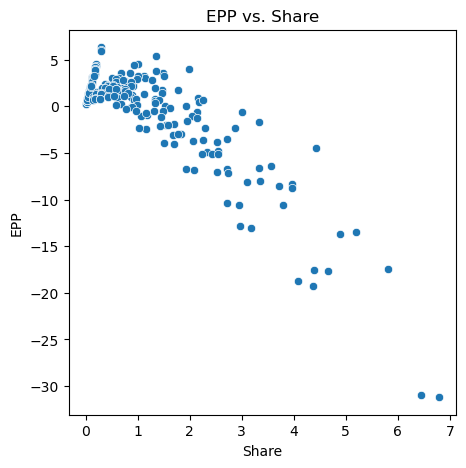

In [28]:
share_epp_plot = all_prod_final[['Share', 'EPP']]
plt.figure(figsize=(5,5))
sns.scatterplot(x = all_prod_final['Share'],y = all_prod_final['EPP'])
plt.title("EPP vs. Share")